In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('quora_duplicate_questions.tsv', delimiter='\t')
dataset.drop(['id', 'qid1', 'qid2'], axis=1, inplace=True)
dataset.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


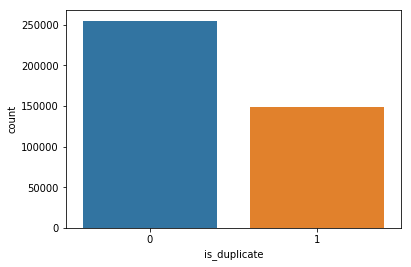

In [4]:
sns.countplot(data=dataset, x='is_duplicate')
# plt.title("Count Plot of question pairs")
plt.show()

In [8]:
features = pd.read_csv("final_features.csv", delimiter='\t')
features.head(1)

,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,...,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,9,20,20,14,12,...,3.774843,1.0,75.949318,0.275348,0.125323,0.137314,0.008893,-0.099771,0.108845,0.344742


In [6]:
# sns.despine(left=True)
#d = features_1.is_duplicate
#sns.distplot(d, kde=False)
#plt.show()

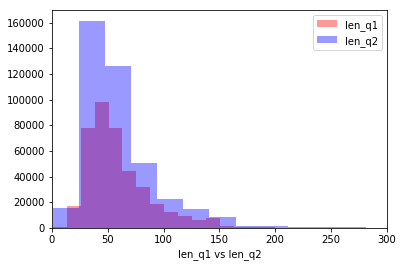

In [9]:
# sns.despine(left=True)
d = features.len_q1
e = features.len_q2
sns.distplot(d, kde=False, label="len_q1", color="r")
sns.distplot(e, kde=False, label="len_q2", color="b")
plt.legend()
# plt.title("Distribution of lengths of question pairs")
axes = plt.gca()
axes.set_xlim([0,300])
plt.xlabel("len_q1 vs len_q2")
plt.show()

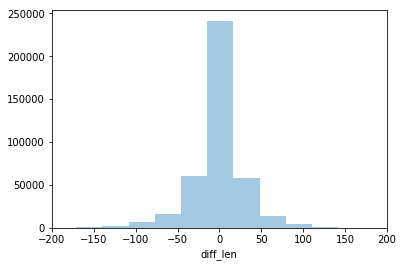

In [10]:
# sns.despine(left=True)
d = features.diff_len
sns.distplot(d, kde=False, label="len_q1")
# plt.title("Distribution of length difference of question pairs")
axes = plt.gca()
axes.set_xlim([-200,200])
plt.show()

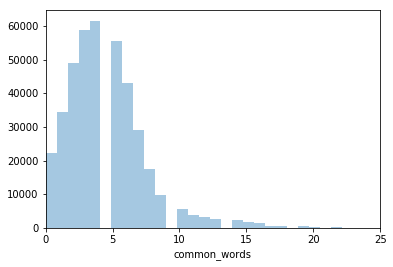

In [11]:
# sns.despine(left=True)
d = features.common_words
sns.distplot(d, kde=False, label="len_q1")
# plt.title("Distribution of common words of question pairs")
axes = plt.gca()
axes.set_xlim([0,25])
plt.show()

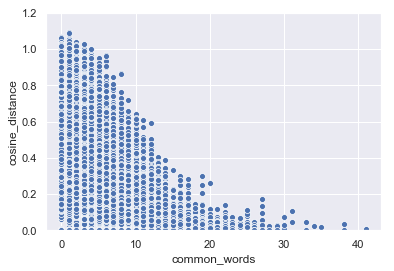

In [9]:
sns.set(style="darkgrid")
sns.scatterplot(x="common_words", y="cosine_distance", data=features)
# plt.title("Scatter plot relation of common words with cosine distance of question pairs")
axes = plt.gca()
axes.set_ylim([0,1.2])
plt.show()

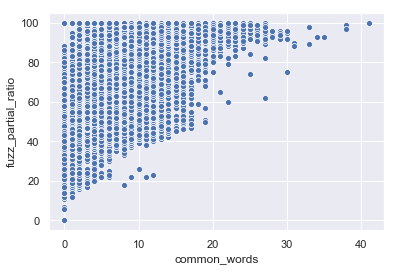

In [10]:
sns.set(style="darkgrid")
sns.scatterplot(x="common_words", y="fuzz_partial_ratio", data=features)
# plt.title("Scatter plot relation of common words with Levenshtein distance of question pairs")
axes = plt.gca()
plt.show()

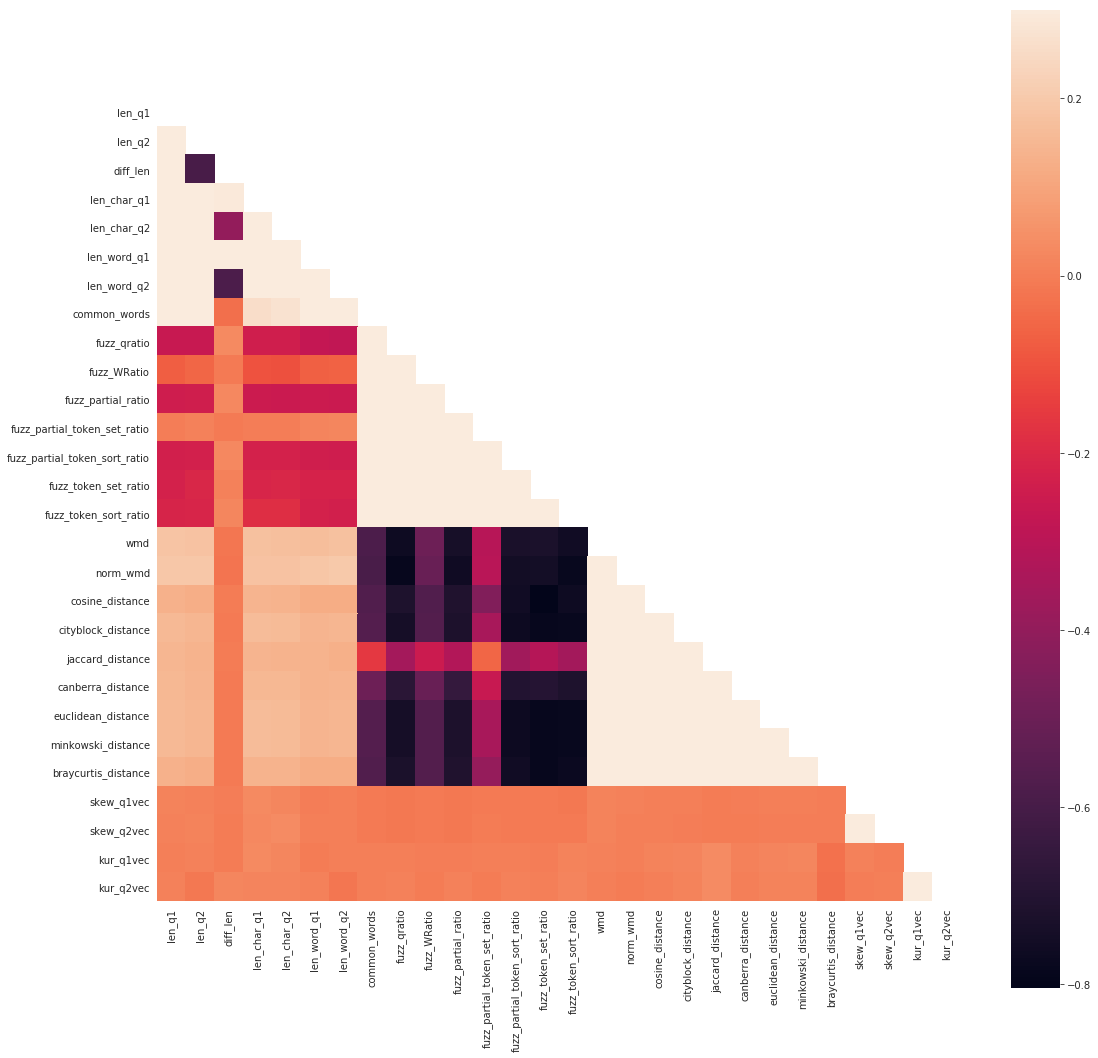

In [5]:
import numpy as np
numbers = features.drop(["question1", "question2","is_duplicate"], axis=1)
corr = numbers.corr()
plt.figure(figsize=(18,18))
# plt.title("Corelation matrix heatmap of question pairs features")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)    
#     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, fmt=".2f")